In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load datasets
features = pd.read_csv('C:/Users/vnish/Downloads/Wallmart Sales Forecast/features.csv')
stores = pd.read_csv('C:/Users/vnish/Downloads/Wallmart Sales Forecast/stores.csv')
sales = pd.read_csv('C:/Users/vnish/Downloads/Wallmart Sales Forecast/sales.csv')
holiday = pd.read_csv('C:/Users/vnish/Downloads/Wallmart Sales Forecast/holiday.csv')

In [26]:
# Convert 'Date' to datetime format
sales['Date'] = pd.to_datetime(sales['Date'])
features['Date'] = pd.to_datetime(features['Date'])
holiday['Date'] = pd.to_datetime(holiday['Date'])

In [27]:
# Rename Column
holiday.rename(columns={"IsHoliday":"Is_Holiday"},inplace=True)
sales.rename(columns={"IsHoliday":"Is_Holiday"},inplace=True)
features.rename(columns={"IsHoliday":"Is_Holiday"},inplace=True)

In [ ]:
# Merge datasets
cleaned_sales_data_final1=sales.merge(features,how='left',on=['Store','Date'])
cleaned_sales_data_final1 = cleaned_sales_data_final1.merge(stores, on='Store', how='left')
cleaned_sales_data_final1 = cleaned_sales_data_final1.merge(holiday[['Date', 'Is_Holiday']], on='Date', how='left')

# Save cleaned dataset
cleaned_sales_data_final1.to_csv('C:/Users/vnish/Downloads/Wallmart Sales Forecast/cleaned_sales_data.csv', index=False)

# Load the dataset
file_path = ("C:/Users/vnish/Downloads/Wallmart Sales Forecast/cleaned_sales_data.csv")  # Update the path if needed
cleaned_sales_data_final1 = pd.read_csv(file_path)

# Drop duplicate holiday columns, keeping only 'Is_Holiday'
cleaned_sales_data_final1.drop(columns=['Is_Holiday_x', 'Is_Holiday'], errors='ignore', inplace=True)

# Rename Is_Holiday_y Column
holiday.rename(columns={"Is_Holiday_y":"Is_Holiday"},inplace=True)

# Convert 'Date' column to datetime format
cleaned_sales_data_final1['Date'] = pd.to_datetime(cleaned_sales_data_final1['Date'])
    
# Fill missing values in MarkDown columns with 0 (assuming no markdown applied)
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
cleaned_sales_data_final1[markdown_cols] = cleaned_sales_data_final1[markdown_cols].fillna(0)

# Save the cleaned dataset
cleaned_sales_data_final1.to_csv("C:/Users/vnish/Downloads/Wallmart Sales Forecast/cleaned_sales_data_final1.csv", index=False)

# Display confirmation message
print(" Data cleaning complete! File saved as 'cleaned_sales_data_final.csv'.")

# Display dataset info to confirm changes
cleaned_sales_data_final1.info()

✅ Data cleaning complete! File saved as 'cleaned_sales_data_final.csv'.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     421570 non-null  float64       
 7   MarkDown2     421570 non-null  float64       
 8   MarkDown3     421570 non-null  float64       
 9   MarkDown4     421570 non-null  float64       
 10  MarkDown5     421570 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  Is_Holiday_y  421570 non-null  bool          
 

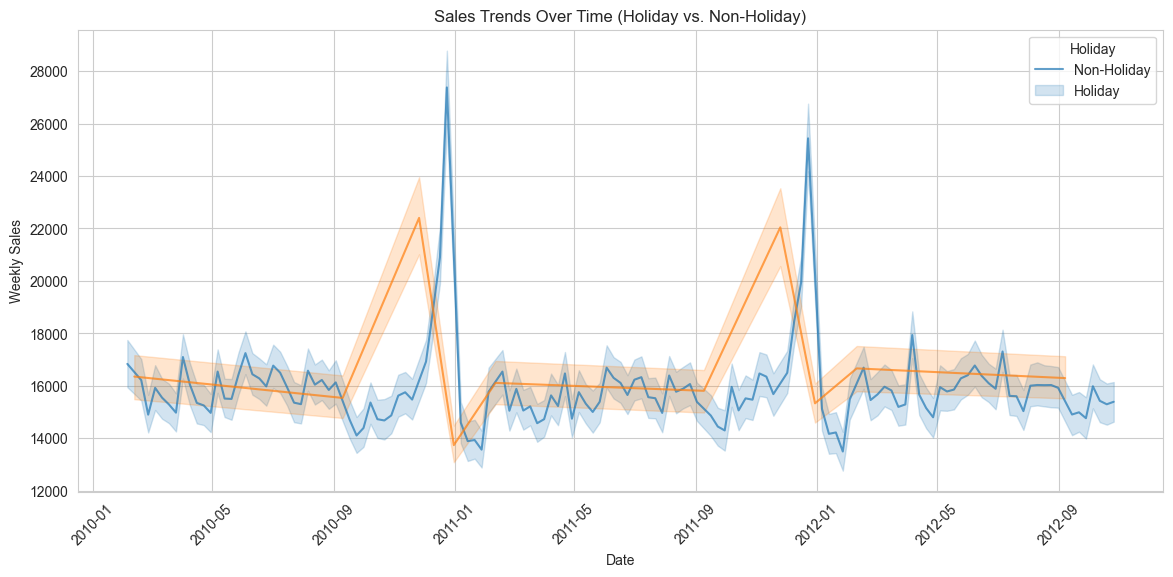

In [ ]:
# Plot sales trend over time (Holiday vs. Non-Holiday)
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))
sns.lineplot(data=cleaned_sales_data_final1, x="Date", y="Weekly_Sales", hue="Is_Holiday_y", alpha=0.7)
plt.title("Sales Trends Over Time (Holiday vs. Non-Holiday)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.legend(title="Holiday", labels=["Non-Holiday", "Holiday"])
plt.show()

C:\Users\vnish\AppData\Local\Temp\ipykernel_22580\3926045236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_sales, x="Is_Holiday_y", y="Weekly_Sales", palette=["blue", "red"])


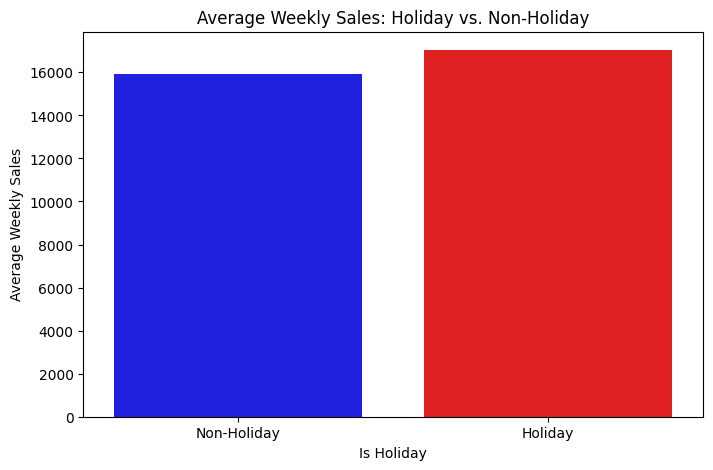

In [ ]:
# Calculate average sales for Holiday vs Non-Holiday
holiday_sales = cleaned_sales_data_final1.groupby('Is_Holiday_y')['Weekly_Sales'].mean().reset_index()

# Plot the comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_sales, x="Is_Holiday_y", y="Weekly_Sales", palette=["blue", "red"])
plt.title("Average Weekly Sales: Holiday vs. Non-Holiday")
plt.xlabel("Is Holiday")
plt.ylabel("Average Weekly Sales")
plt.xticks([0, 1], ["Non-Holiday", "Holiday"])
plt.show()

C:\Users\vnish\AppData\Local\Temp\ipykernel_15204\3295687753.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_sales, x="Store", y="Weekly_Sales", palette="coolwarm")


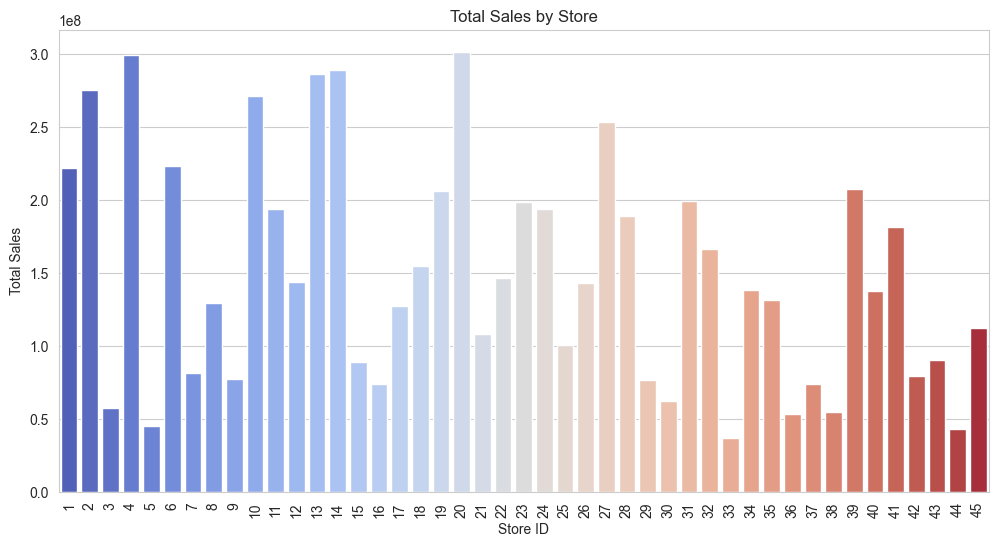

In [ ]:
# Group by Store and calculate total sales
store_sales = cleaned_sales_data_final1.groupby("Store")["Weekly_Sales"].sum().reset_index()

# Sort by total sales
store_sales = store_sales.sort_values(by="Weekly_Sales", ascending=False)

# Plot store-wise sales
plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x="Store", y="Weekly_Sales", palette="coolwarm")
plt.title("Total Sales by Store")
plt.xlabel("Store ID")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

C:\Users\vnish\AppData\Local\Temp\ipykernel_15204\852824867.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_sales, x="Dept", y="Weekly_Sales", palette="viridis")


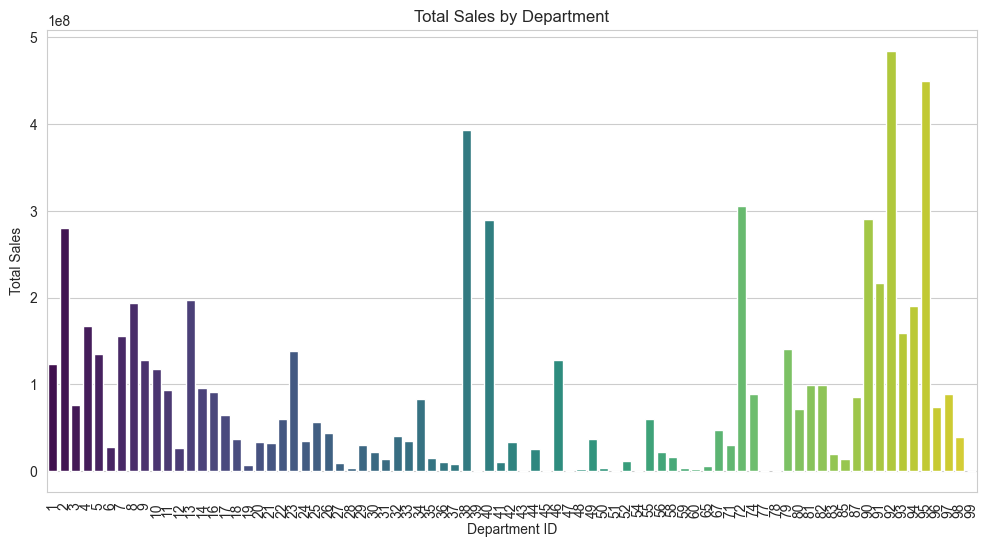

In [ ]:
# Group by Department and calculate total sales
dept_sales = cleaned_sales_data_final1.groupby("Dept")["Weekly_Sales"].sum().reset_index()

# Sort by total sales
dept_sales = dept_sales.sort_values(by="Weekly_Sales", ascending=False)

# Plot department-wise sales
plt.figure(figsize=(12, 6))
sns.barplot(data=dept_sales, x="Dept", y="Weekly_Sales", palette="viridis")
plt.title("Total Sales by Department")
plt.xlabel("Department ID")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()


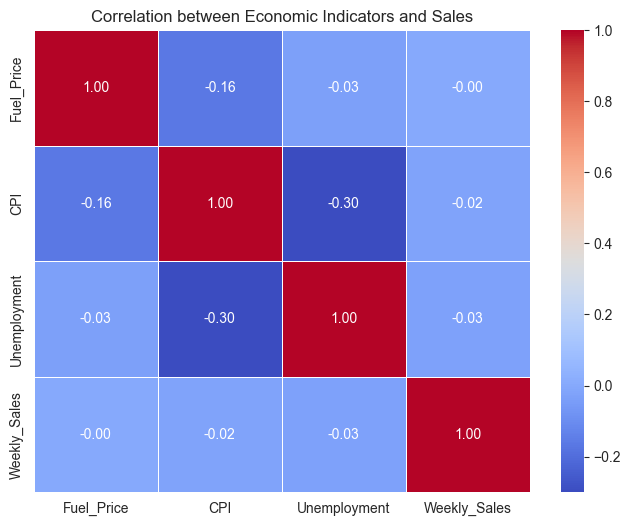

In [ ]:
# Correlation Analysis (Fuel Price, CPI, Unemployment vs. Sales)
# Selecting relevant columns
corr_columns = ['Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']

# Compute correlation matrix
correlation_matrix = cleaned_sales_data_final1[corr_columns].corr()

# Display correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Economic Indicators and Sales")
plt.show()

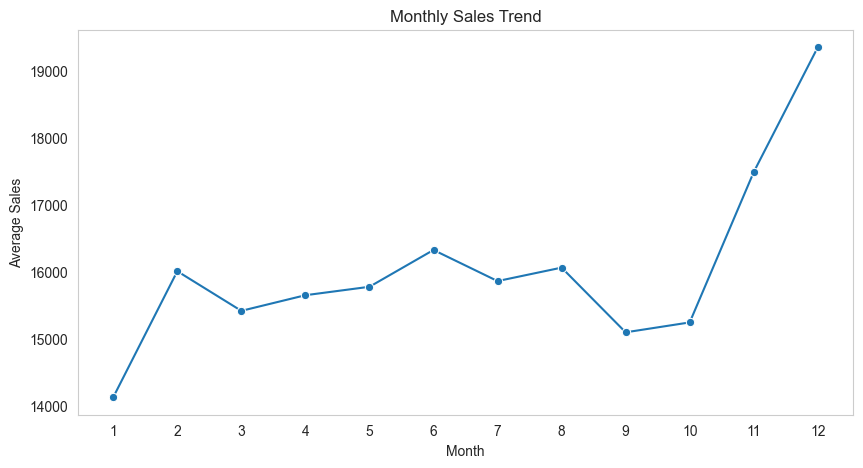

In [ ]:
# Seasonal Trends in Sales (Monthly & Yearly Analysis)
# Extract year and month
cleaned_sales_data_final1['Year']=cleaned_sales_data_final1['Date'].dt.year
cleaned_sales_data_final1['Month']=cleaned_sales_data_final1['Date'].dt.month

# Group by Month to get average sales per month
monthly_sales = cleaned_sales_data_final1.groupby('Month')['Weekly_Sales'].mean()

# Plot Monthly Trend
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.xticks(range(1,13))  # Ensure months 1-12 appear
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Monthly Sales Trend')
plt.grid()
plt.show()

C:\Users\vnish\AppData\Local\Temp\ipykernel_15204\767875173.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='coolwarm')


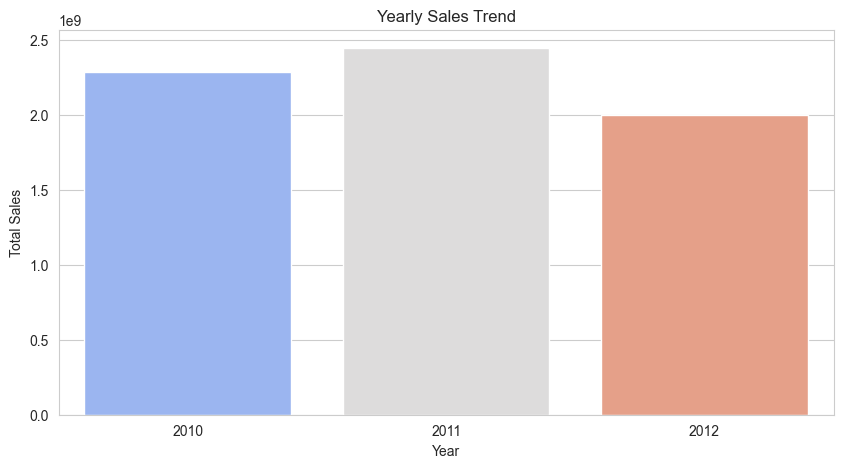

In [ ]:
# Group by Year
yearly_sales = cleaned_sales_data_final1.groupby('Year')['Weekly_Sales'].sum()

# Plot Yearly Sales
plt.figure(figsize=(10,5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='coolwarm')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trend')
plt.show()

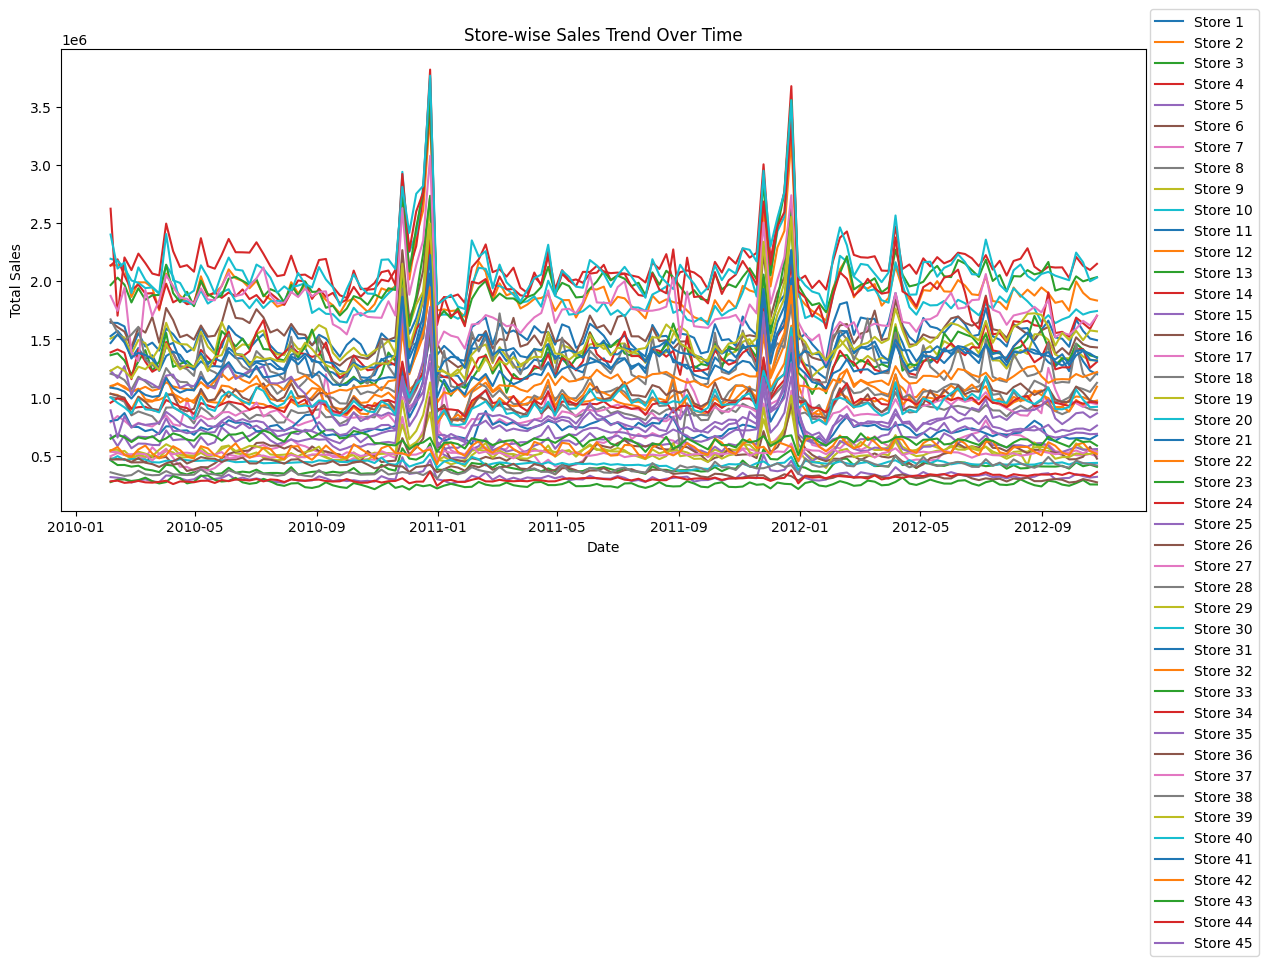

In [ ]:
# Aggregate sales by Date and Store
store_trend = cleaned_sales_data_final1.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
for store in store_trend['Store'].unique():
    store_sales = store_trend[store_trend['Store'] == store]
    plt.plot(store_sales['Date'], store_sales['Weekly_Sales'], label=f"Store {store}")

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Store-wise Sales Trend Over Time")
plt.legend(loc='upper right', bbox_to_anchor=(1.11, 1.1))
plt.show()

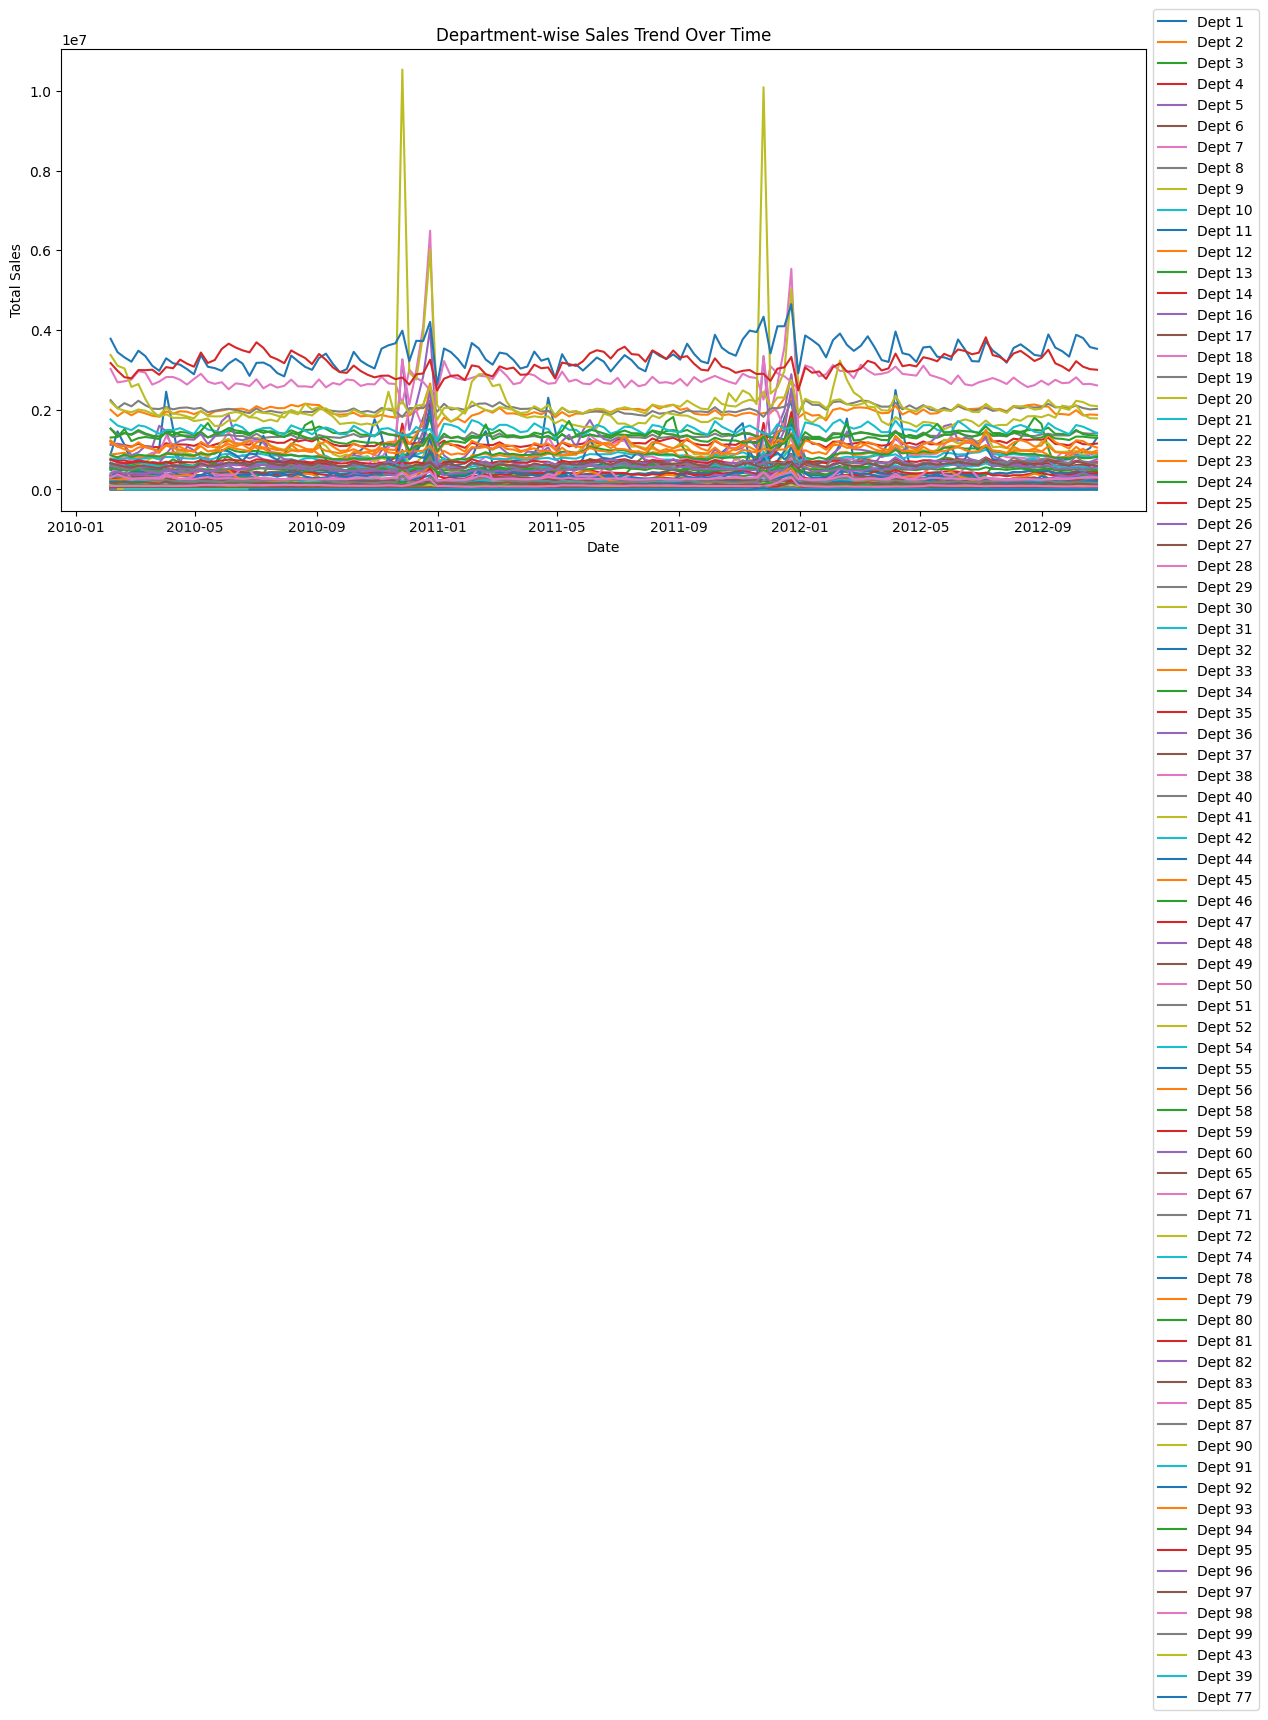

In [ ]:
# Aggregate sales by Date and Department
dept_trend = cleaned_sales_data_final1.groupby(['Date', 'Dept'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
for dept in dept_trend['Dept'].unique():
    dept_sales = dept_trend[dept_trend['Dept'] == dept]
    plt.plot(dept_sales['Date'], dept_sales['Weekly_Sales'], label=f"Dept {dept}")

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Department-wise Sales Trend Over Time")
plt.legend(loc='upper right', bbox_to_anchor=(1.11, 1.1))
plt.show()

03:04:32 - cmdstanpy - INFO - Chain [1] start processing
03:04:32 - cmdstanpy - INFO - Chain [1] done processing


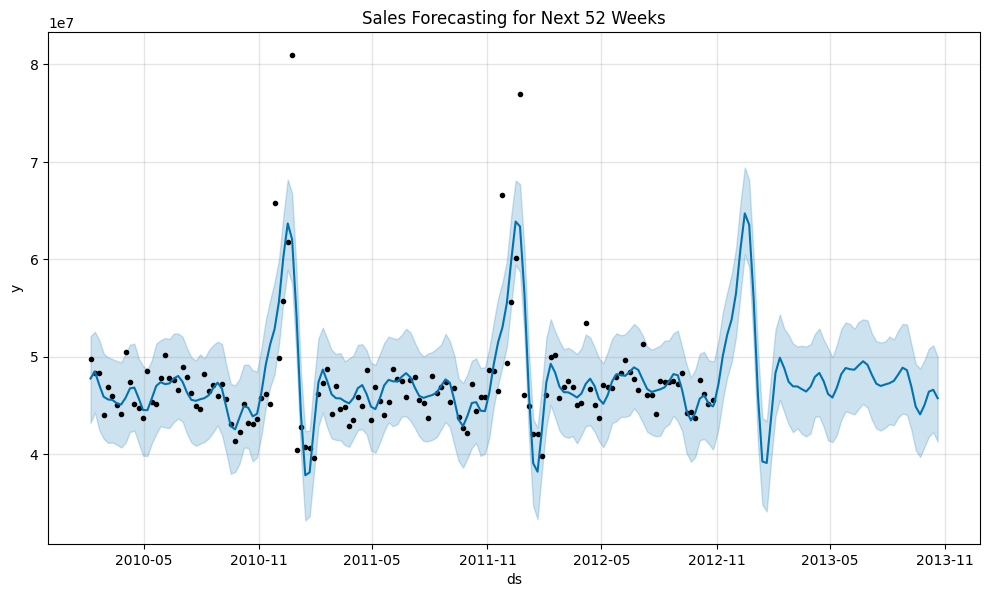

In [ ]:
# Aggregate total sales over time
sales_trend = cleaned_sales_data_final1.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Set Date as index
sales_trend.set_index('Date', inplace=True)

# Use Facebook Prophet for Forecasting
from prophet import Prophet

# Rename columns for Prophet
sales_trend = sales_trend.reset_index()
sales_trend = sales_trend.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Initialize model
model = Prophet()
model.fit(sales_trend)

# Create future dates
future = model.make_future_dataframe(periods=52, freq='W')

# Predict future sales
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Sales Forecasting for Next 52 Weeks")
plt.show()


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecasted_sales.csv', index=False)

In [16]:
# Load actual sales data
cleaned_sales_data_final1 = pd.read_csv("C:/Users/vnish/Downloads/Wallmart Sales Forecast/cleaned_sales_data_final1.csv")

# Ensure Date is in datetime format
cleaned_sales_data_final1['Date'] = pd.to_datetime(cleaned_sales_data_final1['Date'])

# Aggregate actual sales to a weekly level
weekly_actual_sales = cleaned_sales_data_final1.groupby('Date', as_index=False)['Weekly_Sales'].sum()

# Load forecasted sales data
forecasted_sales = pd.read_csv("C:/Users/vnish/Downloads/Wallmart Sales Forecast/forecasted_sales.csv")

# Ensure forecasted Date is in datetime format
forecasted_sales['ds'] = pd.to_datetime(forecasted_sales['ds'])

# Merge actual and forecasted sales
merged_sales = pd.merge(forecasted_sales, weekly_actual_sales, left_on='ds', right_on='Date', how='left')

# Drop duplicate date column
merged_sales.drop(columns=['Date'], inplace=True)

# Save the merged file
merged_sales.to_csv("C:/Users/vnish/Downloads/Wallmart Sales Forecast/merged_sales.csv", index=False)

print("Aggregation complete. Merged data saved as 'merged_sales.csv'")

Aggregation complete. Merged data saved as 'merged_sales.csv'


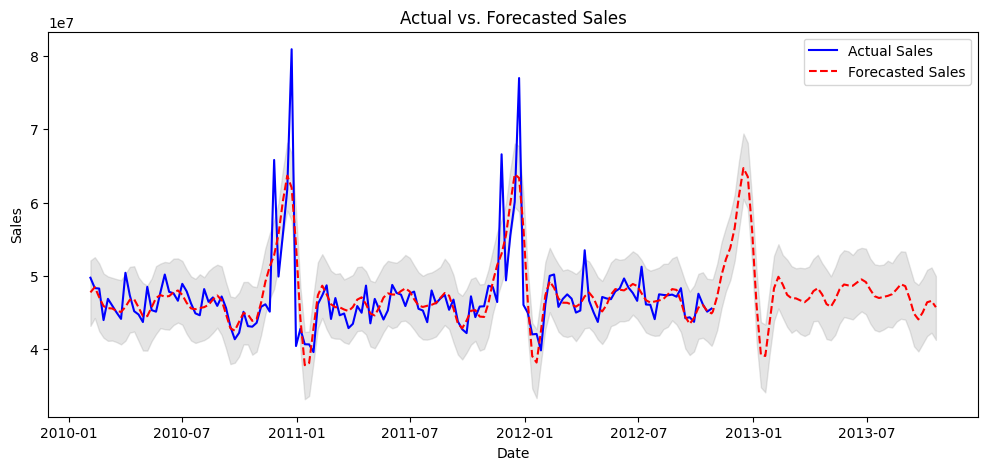

In [22]:
import matplotlib.pyplot as plt

# Plot actual vs predicted sales
plt.figure(figsize=(12, 5))
plt.plot(merged_sales['ds'], merged_sales['Weekly_Sales'], label="Actual Sales", color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label="Forecasted Sales", color='red', linestyle='dashed')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs. Forecasted Sales")
plt.legend()
plt.show()

In [79]:
import pandas as pd
import numpy as np
from prophet import Prophet

# Load cleaned sales data
cleaned_sales_data_final1 = pd.read_csv("cleaned_sales_data_final1.csv")

# Ensure date column is in datetime format
cleaned_sales_data_final1['Date'] = pd.to_datetime(cleaned_sales_data_final1['Date'])

# Filter required columns
# Ensure 'Is_Holiday' is numeric
cleaned_sales_data_final1['Is_Holiday'] = cleaned_sales_data_final1['Is_Holiday'].astype(int)
cleaned_sales_data_final1 = cleaned_sales_data_final1[['Date', 'Store', 'Dept', 'Weekly_Sales', 'Is_Holiday']]

# Initialize an empty list to store results
forecast_results = []

# Get unique Store-Dept combinations
store_dept_combinations = cleaned_sales_data_final1[['Store', 'Dept']].drop_duplicates()

# Loop through each Store-Dept and train a model
for index, row in store_dept_combinations.iterrows():
    store, dept = row['Store'], row['Dept']
    
    # Filter data for the specific Store-Dept
    cleaned_sales_data_final1_filtered = cleaned_sales_data_final1[
        (cleaned_sales_data_final1['Store'] == store) & (cleaned_sales_data_final1['Dept'] == dept)
    ]
    
    # Skip if insufficient data
    if cleaned_sales_data_final1_filtered.shape[0] < 20:
        continue
    
    # Prepare data for Prophet
    cleaned_sales_data_final1_prophet = cleaned_sales_data_final1_filtered[['Date', 'Weekly_Sales', 'Is_Holiday']].copy()
    cleaned_sales_data_final1_prophet.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)

    # Define and fit the Prophet model
    model = Prophet(interval_width=0.95)
    model.add_regressor('Is_Holiday')  # Add holiday as a regressor
    model.fit(cleaned_sales_data_final1_prophet)

    # Create future dataframe (next 12 weeks)
    future = model.make_future_dataframe(periods=12, freq='W')
    # Add 'Is_Holiday' column to the future DataFrame (default to 0 for future dates)
    future = future.merge(
        cleaned_sales_data_final1_prophet[['ds', 'Is_Holiday']],
        on='ds',
        how='left'
    )
    future['Is_Holiday'].fillna(0, inplace=True)

    # Predict
    forecast = model.predict(future)

    # Add Store & Dept columns to forecasted data
    forecast['Store'] = store
    forecast['Dept'] = dept

    # Append to results
    forecast_results.append(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'Store', 'Dept']])

# Combine all forecasted data
forecast_cleaned_sales_data_final1 = pd.concat(forecast_results, ignore_index=True)

# Rename columns for merging with actual sales
forecast_cleaned_sales_data_final1.rename(columns={'ds': 'Date', 'yhat': 'Forecasted_Sales'}, inplace=True)

# Save the forecasted sales data
forecast_cleaned_sales_data_final1.to_csv("forecasted_sales_store_dept.csv", index=False)

print("✅ Forecasting completed & saved as 'forecasted_sales_store_dept.csv'")

00:21:49 - cmdstanpy - INFO - Chain [1] start processing
00:21:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\vnish\AppData\Local\Temp\ipykernel_9596\2532497417.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future['Is_Holiday'].fillna(0, inplace=True)
00:21:50 - cmdstanpy - INFO - Chain [1] start processing
00:21:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\vnish\AppData\Local\Temp\ipykernel_9596\2532497417.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series thr

✅ Forecasting completed & saved as 'forecasted_sales_store_dept.csv'


In [81]:
import pandas as pd

# Load actual sales data
actual_sales = pd.read_csv("cleaned_sales_data_final1.csv")

# Load forecasted sales data
forecast_sales = pd.read_csv("C:/Users/vnish/Downloads/Wallmart Sales Forecast/forecasted_sales_store_dept.csv")

# Convert 'Date' to datetime format for accurate merging
actual_sales['Date'] = pd.to_datetime(actual_sales['Date'])
forecast_sales['Date'] = pd.to_datetime(forecast_sales['Date'])

# Keep only necessary columns from actual sales
actual_sales = actual_sales[['Date', 'Store', 'Dept', 'Weekly_Sales']]

# Merge actual and forecasted sales on Store, Dept, and Date
merged_sales = pd.merge(actual_sales, forecast_sales, on=['Date', 'Store', 'Dept'], how='outer')

# Save the merged dataset for Power BI
merged_sales.to_csv("merged_sales_with_forecast.csv", index=False)

print("✅ Merged sales data saved as 'merged_sales_with_forecast.csv'")


✅ Merged sales data saved as 'merged_sales_with_forecast.csv'


In [ ]:
# Load merged dataset
merged_sales = pd.read_csv("C:/Users/vnish/Downloads/Wallmart Sales Forecast/merged_sales_with_forecast.csv")

# Forward fill for missing Weekly Sales values
merged_sales['Weekly_Sales'].fillna(method='ffill', inplace=True)

# If forward fill is not enough, use moving average (3-week window)
merged_sales['Weekly_Sales'] = merged_sales['Weekly_Sales'].fillna(merged_sales['Weekly_Sales'].rolling(window=3, min_periods=1).mean())

# Fill missing Forecasted_Sales with previous week's forecast
merged_sales['Forecasted_Sales'].fillna(method='ffill', inplace=True)

# Fill missing confidence interval values using previous values
merged_sales['yhat_upper'].fillna(method='ffill', inplace=True)
merged_sales['yhat_lower'].fillna(method='ffill', inplace=True)


# Drop rows where both Weekly_Sales & Forecasted_Sales are missing
merged_sales.dropna(subset=['Weekly_Sales', 'Forecasted_Sales'], how='all', inplace=True)

# Save cleaned dataset
merged_sales.to_csv("cleaned_merged_sales_with_forecast.csv", index=False)

print("✅ Cleaned dataset saved as 'cleaned_merged_sales_with_forecast.csv'")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/vnish/Downloads/Wallmart Sales Forecast/merged_sales_with_forecast.csv'